In [17]:
import numpy as np
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import joblib
import json

In [18]:
JSON_PATH = 'myData.json'

In [19]:
def load_data(json_path):
    with open(json_path, 'r') as dataset:
        data_str = dataset.read()
    data = json.loads(data_str)
    return data['mapping'], data['mfcc'], data['labels']

In [20]:
def test_model(model, X, y):
    mae_train = []
    mae_test = []
    kf = KFold(n_splits=10, shuffle=True)
    X = np.array(X[500:])
    y= np.array(y[500:])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25)
        train_model = model
        train_model.fit(X_train, y_train)
        y_validation_pred = train_model.predict(X_validation)
        y_train_pred = train_model.predict(X_train)
        y_test_pred = train_model.predict(X_test)
        mae_train.append(metrics.mean_squared_error(y_train, y_train_pred))
        mae_test.append(metrics.mean_squared_error(y_test, y_test_pred))
        acc_train = metrics.accuracy_score(y_train, y_train_pred)
        acc_validation = metrics.accuracy_score(y_validation, y_validation_pred)
        print(f'Accuracy on train: {acc_train}, Accuracy on validation: {acc_validation}')

    folds = range(1, kf.get_n_splits() + 1)
    plt.plot(folds, mae_train, 'o-', color='green', label='train')
    plt.plot(folds, mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Squared Error')
    plt.show()

In [21]:
def main(data_path, kernel='linear'):
    _, inputs, targets = load_data(data_path)
    model = svm.SVC(kernel=kernel, C=2)
    test_model(model, inputs, targets)

In [22]:
def save_model(model):
    svc = model
    joblib.dump(svc, 'last_svc.model')

Accuracy on train: 0.8426666666666667, Accuracy on validation: 0.82
Accuracy on train: 0.8373333333333334, Accuracy on validation: 0.822
Accuracy on train: 0.8253333333333334, Accuracy on validation: 0.842
Accuracy on train: 0.8433333333333334, Accuracy on validation: 0.842
Accuracy on train: 0.8466666666666667, Accuracy on validation: 0.826


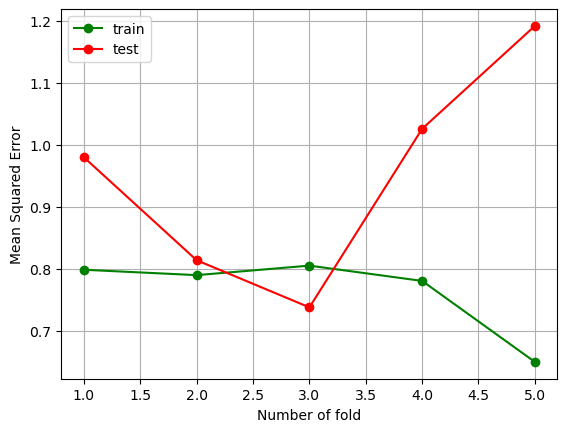

In [23]:
main(JSON_PATH)

In [24]:
# _, inputs, targets = load_data(JSON_PATH)
# print(type(inputs))